In [1]:
import os
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

# define environment before importing any DRP related modules
# os.environ["LVMCORE_DIR"] = "/Users/droryn/prog/lvm/lvmcore"
# os.environ["LVM_MASTER_DIR"] = "/Users/droryn/work/LVM/data/calib"
# os.environ["SAS_BASE_DIR"] = "/Users/droryn/work/LVM/data/sas"
# os.environ["LVM_DATA_S"] = "/Users/droryn/work/LVM/data/sas/sdsswork/data/lvm/lco"
os.environ["LVM_SPECTRO_REDUX"] = "/home/mejia/Research/lvm/lvmdata"
ORIG_MASTER_DIR = os.getenv("LVM_MASTER_DIR")

from lvmdrp import path, __version__ as drpver
from lvmdrp.utils import metadata as md
from lvmdrp.functions import run_drp as drp
from lvmdrp.functions import run_quickdrp as qdrp


Gaia DR3 6813658512058329344 329.8235176 -22.87174902 mag 7.3)
60184 3900 1.068
60184 3901 1.059
60184 3902 1.050
60184 3903 1.042
60184 3904 1.035
60184 3905 1.029
60184 3906 1.023
60184 3907 1.019
60184 3908 1.015
60184 3909 1.012
60184 3910 1.009
60184 3911 1.007

Gaia DR3 5010284310919786496 25.36412438 -38.13257486 mag 6.102385
60182 3793 1.017
60182 3794 1.015
60182 3795 1.013
60182 3796 1.013
60182 3797 1.013
60182 3798 1.013
60182 3799 1.015
60182 3800 1.017
60182 3801 1.02
60182 3802 1.024
60182 3803 1.028
60182 3804 1.034

In [2]:
drp.get_frames_metadata(mjd=60182, overwrite=False)
drp.get_frames_metadata(mjd=60184, overwrite=False)

[INFO]: loading metadata store at /home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60182/raw_metadata.hdf5
[INFO]: Loading existing metadata store.
[INFO]: loading metadata store at /home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60182/raw_metadata.hdf5
[INFO]: found 531 frames in store '/home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60182/raw_metadata.hdf5'
[INFO]: number of frames after filtering 531
[INFO]: total number of frames found 531
[INFO]: loading metadata store at /home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60184/raw_metadata.hdf5
[INFO]: Loading existing metadata store.
[INFO]: loading metadata store at /home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60184/raw_metadata.hdf5
[INFO]: found 639 frames in store '/home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60184/raw_metadata.hdf5'


,hemi,tileid,mjd,rmjd,imagetyp,spec,camera,expnum,exptime,neon,...,xenon,argon,ldls,quartz,quality,qual,stage,status,drpqual,name
0,s,1111,60184,60183,object,sp2,z2,3860,0.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-z2-00003860.fits
1,s,1111,60184,60183,object,sp3,z3,3863,150.0,False,...,False,False,True,False,excellent,0,1,0,0,sdR-s-z3-00003863.fits
2,s,1111,60184,60184,object,sp3,r3,3892,300.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-r3-00003892.fits
3,s,1111,60184,60183,object,sp1,b1,3854,0.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-b1-00003854.fits
4,s,1111,60184,60184,object,sp1,b1,3900,300.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-b1-00003900.fits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,s,1111,60184,60184,object,sp3,r3,3900,300.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-r3-00003900.fits
635,s,1111,60184,60183,object,sp1,z1,3874,10.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-z1-00003874.fits
636,s,1111,60184,60183,object,sp3,z3,3860,0.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-z3-00003860.fits
637,s,1111,60184,60184,object,sp1,b1,3908,300.0,False,...,False,False,False,False,excellent,0,1,0,0,sdR-s-b1-00003908.fits


In [3]:
#sci_metadata = md.get_metadata(tileid="*", mjd="*", expnum=3793, imagetyp="object")
# qdrp.quick_reduction(["-e", 3793, "-f"])

In [4]:

def get_gaia_spec(gaia_id):
    # https://gea.esac.esa.int/archive/
    gaia_dir = "/home/mejia/Research/lvm/lvmdata/gaia/"

    data = np.genfromtxt(gaia_dir+'XP_SAMPLED-Gaia DR3 '+gaia_id+'.csv', delimiter=',')
    #data = np.genfromtxt(gaia_dir+'XP_SAMPLED-Gaia DR3 5010284310919786496.csv', delimiter=',')
    # in W/m^2/nm
    wave = data[1:,4] * 10   # convert to A
    flux = data[1:,5] * 1e7 / 100**2 / 10 # covert from W/m^2/nm to ergs/s/cm^2/A
    dflux = data[1:,6] * 1e7 / 100**2 / 10
    return wave,flux,dflux

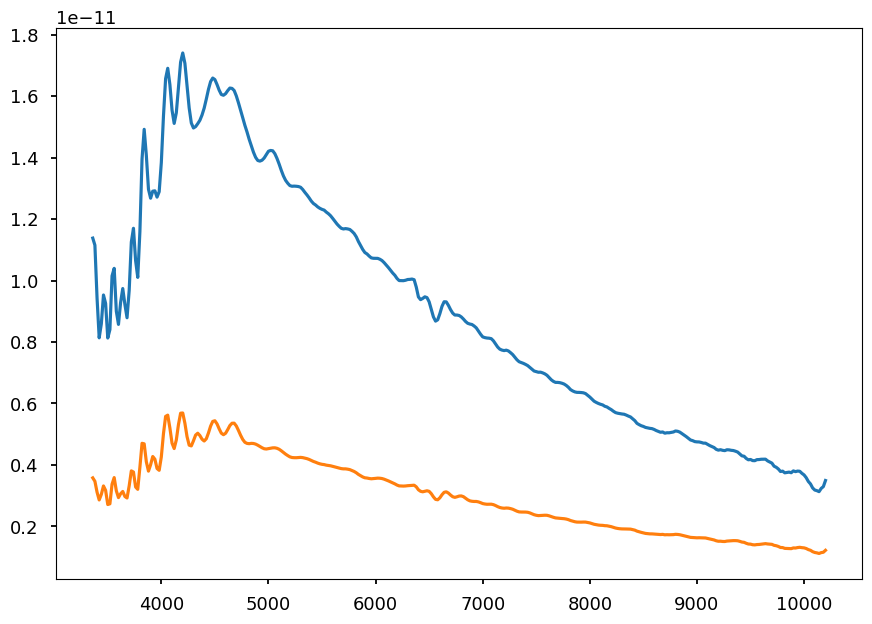

In [5]:
def plot_gaia(gaia_ids):
    for g in gaia_ids:
        w,f,d = get_gaia_spec(g)
        plt.plot(w, f)

plot_gaia(['5010284310919786496','6813658512058329344'])

In [6]:
from astropy.io import fits

def moving_average(x, w=100):
    return x
    # return np.convolve(x, np.ones(w), 'same') / w

def get_fiber_data(mjd, frames):
    s = []
    secz = []
    for fiber,frame in enumerate(frames):
        print(fiber)
        with fits.open('/home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/'+mjd+'/'+frame) as hdul:
            data = hdul[1].data
            mask = hdul[3].data
            data[np.where(mask)] = np.nan
            w = hdul[4].data
            am = hdul[0].header['TESCIAM']
        
        fiber_str = f"P1-{fiber+1}"

        #select fiber for correct spectrograph for science and sky telescopes
        if (fiber == 0 or fiber == 3 or fiber == 6 or fiber == 9 ):
            fiber_sci = f"S1-300"
            fiber_skye = f"B1-1"
            fiber_skyw = f"A1-1"
        elif (fiber == 1 or fiber == 4 or fiber == 7 or fiber == 10 ):
            fiber_sci = f"S2-300"
            fiber_skye = f"B2-1"
            fiber_skyw = f"A2-1"
        elif (fiber == 2 or fiber == 5 or fiber == 8 or fiber == 11 ):
            fiber_sci = f"S3-300"
            fiber_skye = f"B3-12"
            fiber_skyw = f"A3-12"

        f1 = drp.fibermap.data[drp.fibermap.data['orig_ifulabel'] == fiber_sci]['fiberid'][0]-1
        f2 = drp.fibermap.data[drp.fibermap.data['orig_ifulabel'] == fiber_skye]['fiberid'][0]-1
        f3 = drp.fibermap.data[drp.fibermap.data['orig_ifulabel'] == fiber_skyw]['fiberid'][0]-1
        f4 = drp.fibermap.data[drp.fibermap.data['orig_ifulabel'] == fiber_str]['fiberid'][0]-1
        print([f1, f2, f3, f4])
        for i in [f1, f2, f3, f4]:
            if i != 1297:
                zero = (data[i,:]<5) | (data[i]>250)
                data[i,zero] = np.nan
                d = moving_average(data[i,:])
                s.append(d)
                secz.append(am)
    return s, secz, w


0
[322, 71, 36, 1]


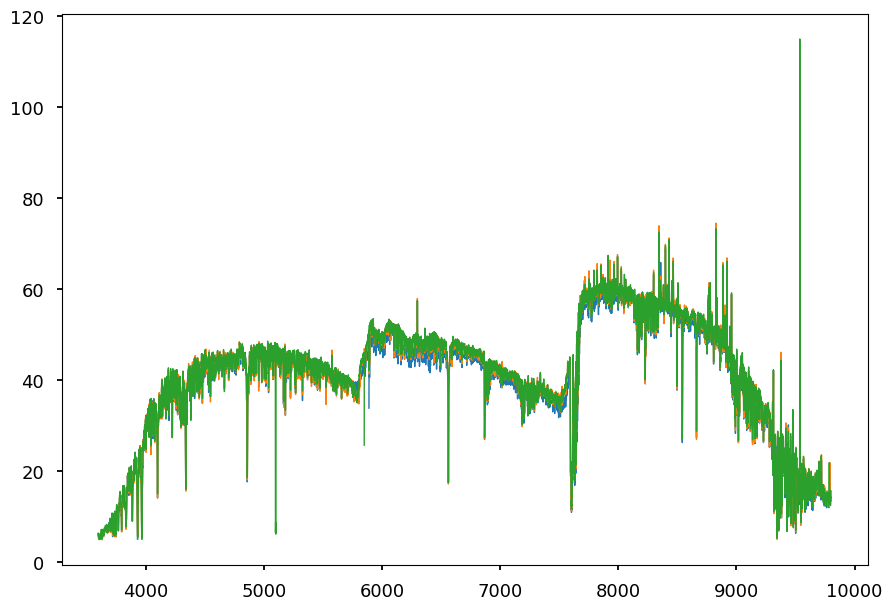

In [7]:
frames2 = ['lvmCFrame-00003793.fits','lvmCFrame-00003794.fits','lvmCFrame-00003795.fits','lvmCFrame-00003796.fits','lvmCFrame-00003797.fits',
          'lvmCFrame-00003798.fits','lvmCFrame-00003799.fits','lvmCFrame-00003800.fits','lvmCFrame-00003801.fits','lvmCFrame-00003802.fits',
          'lvmCFrame-00003803.fits','lvmCFrame-00003804.fits']
frames4 = ['lvmCFrame-00003900.fits','lvmCFrame-00003901.fits','lvmCFrame-00003902.fits','lvmCFrame-00003903.fits','lvmCFrame-00003904.fits',
          'lvmCFrame-00003905.fits','lvmCFrame-00003906.fits','lvmCFrame-00003907.fits','lvmCFrame-00003908.fits','lvmCFrame-00003909.fits',
          'lvmCFrame-00003910.fits', 'lvmCFrame-00003911.fits']
frames4 = frames4[:1]

s, am, w = get_fiber_data('60184', frames4)

for i in range(len(s)):
    plt.plot(w, s[i], linewidth=1)


In [8]:
# convert from flambda to electrons / cm^2/s
#    Input FLAMBDA is in ergs/cm^2/s/A
# Multiply result with collecting area and integration time.
def flambda_to_electrons(wave,flam):
    h = 1.054572e-34*2.*np.pi*1e7  # Planck's constant in erg
    c = 2.997925e+18               # c in A/s
    #number of detected electrons for an object of spectrum flambda
    return flam/h/(c/wave)

def calib(gaia_id, s, am, w):
    gaia_dir = "/home/mejia/Research/lvm/lvmdata/gaia/"
    data = np.genfromtxt(gaia_dir+'lvmi_tput.csv', delimiter=',')
    twave = data[1:,0] * 10   # convert to A
    tput = data[1:,1]

    txt = np.genfromtxt('/home/mejia/Research/lvm/lvmdata/gaia/lco_extinction.txt')
    lext, ext = txt[:,0], txt[:,1]
    ext = np.interp(w, lext, ext)

    wave, flux, _ = get_gaia_spec(gaia_id)
    
    stdflux = flambda_to_electrons(w, np.interp(w, wave, flux))

    aper = np.pi*8**2 # aperture in cm^2
    for i in range(len(s)):
        plt.plot(w, s[i]/10**(-0.4*ext*am[i])/aper/stdflux, linewidth=0.5)#, color='red')

    plt.plot(twave, tput, color='black', linewidth='3')
    plt.xlabel('wavelength/A')
    plt.ylabel('throughput')
    plt.ylim(0.0, 0.5)
    #plt.yscale('log')

    # plt.figure()
    # plt.plot()

0
[322, 71, 36, 1]


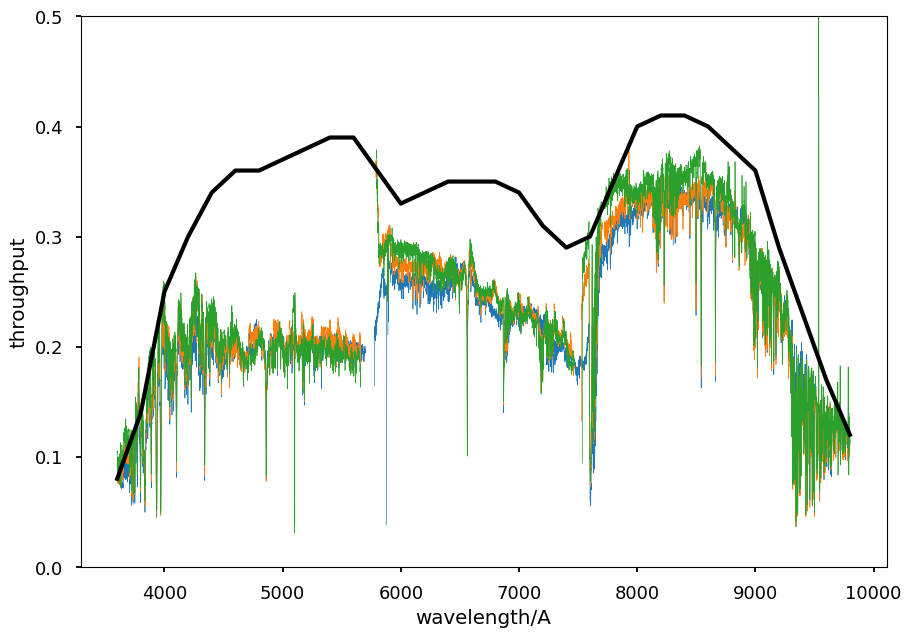

In [132]:
s, am, w = get_fiber_data('60184', frames4)
calib('6813658512058329344', s, am, w)

In [10]:
# s, am, w = get_fiber_data('60182', frames2)
# calib('5010284310919786496', s, am, w)

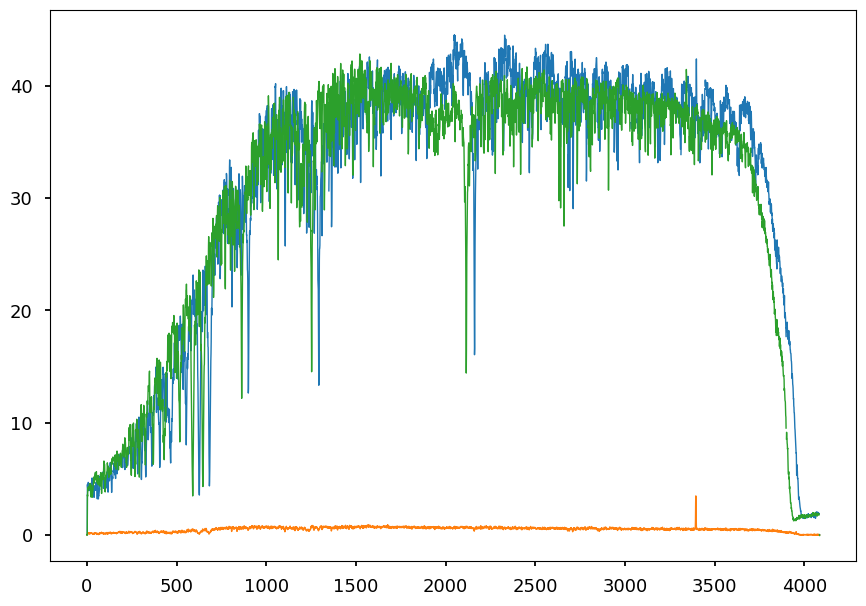

In [52]:
from astropy.io import fits
p='/home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60184/ancillary/'
with fits.open(p+'lvm-xobject-b1-00003900.fits') as hdul:
    d = hdul[0].data
    m = hdul[2].data
    d[np.where(m)] = np.nan
    plt.plot(d[71,:], linewidth=1)
    plt.plot(d[76,:], linewidth=1)
    plt.plot(d[322,:], linewidth=1)
    # plt.ylim(0,100)


fiberid spectrographid blockid finblock ...       fmap      ypix fibstatus
------- -------------- ------- -------- ... --------------- ---- ---------
      3              1      B1        3 ...   Sci1-1:S1B1-3 3992         0
    107              1      B3       35 ... SkyE1-3:S1B3-35 3382         0
     38              1      B2        2 ...  SkyW1-2:S1B2-2 3783         0


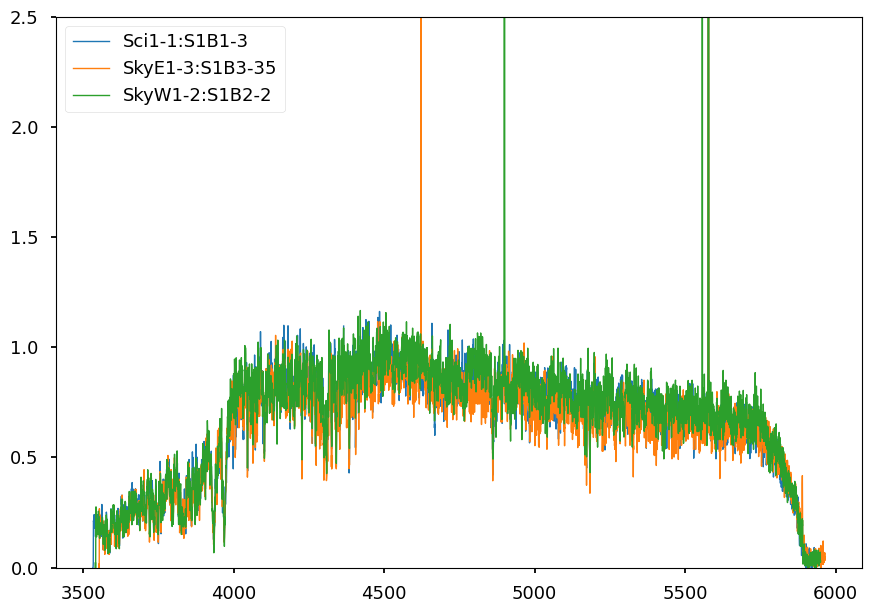

In [78]:
from lvmdrp.core.rss import RSS

fibers = [322, 71, 36, 1]
# fibers = [5, 20, 100, 400]
fibers = [2, 106, 37]

fibermap = Table(drp.fibermap.data)
print(fibermap[fibers])

for cam in ["b1"]:
    rss = RSS()
    rss.loadFitsData(p+f'lvm-wobject-{cam}-00003900.fits')

    for ifiber in fibers:
        plt.plot(rss._wave[ifiber], rss._data[ifiber], "-", lw=1, label=fibermap[ifiber]["fmap"])
    plt.ylim(0,2.5)
plt.legend(loc=2)
plt.savefig("skylight_before_flatfield.png")

[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)


(0.5, 1.5)

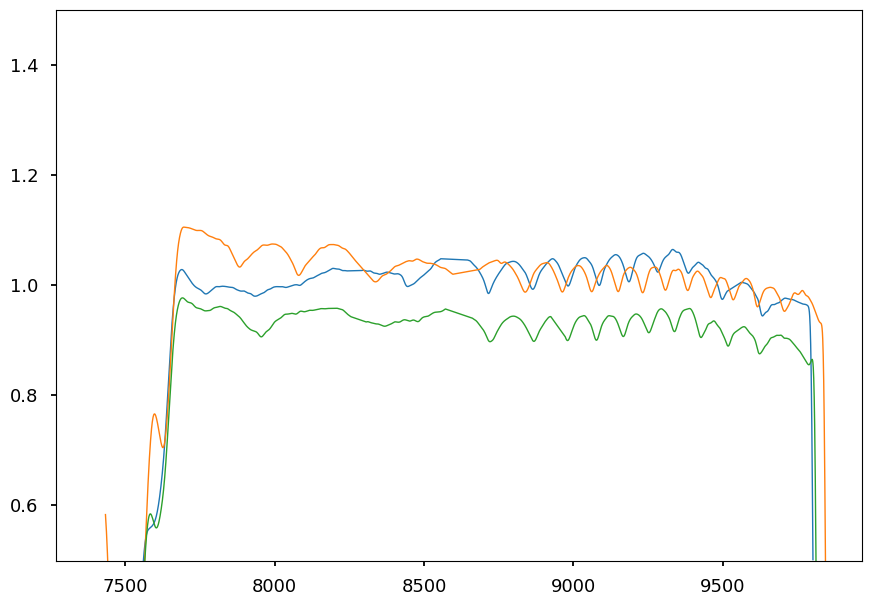

In [96]:
from lvmdrp.core.image import Image


# flat = Image()
# flat.loadFitsData("/home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/calib/lvm-mflat_ldls-b1.fits")
# # flat._slitmap
# fibermap = flat._slitmap[(flat._slitmap["spectrographid"] == int(flat._header["spec"][-1]))]
# spec_selection = (fibermap["targettype"] == "standard")

for cam in {"z1"}:
    fflat = RSS()
    fflat.loadFitsData(f"/home/mejia/Research/lvm/lvmdata/calib/60177/lvm-mfiberflat-{cam}.fits")

    plt.plot(fflat._wave[fibers].T, fflat._data[fibers].T, "-", lw=1)
plt.ylim(0.5,1.5)
# plt.savefig("fiberflat.png")

(0.5, 1.5)

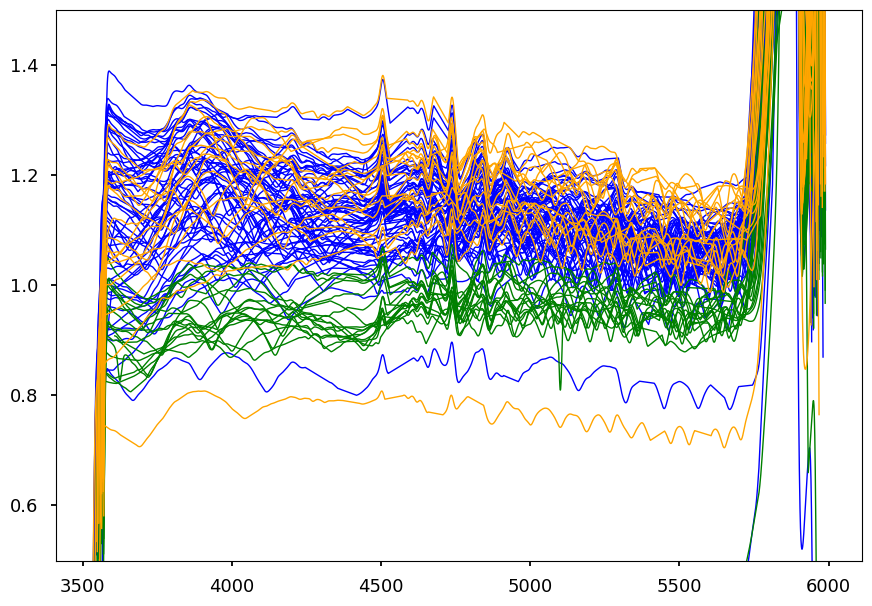

In [102]:
select = np.isin(fibermap["fiberid"]-1, fibers)
skw1_fibers = fibermap[~select][fibermap[~select]["ifulabel"] == "SkyW1"]
ske1_fibers = fibermap[~select][fibermap[~select]["ifulabel"] == "SkyE1"]
sci1_fibers = fibermap[~select][fibermap[~select]["ifulabel"] == "Sci1"]

skw1_fibers, ske1_fibers, sci1_fibers

plt.plot(fflat._wave[sci1_fibers["fiberid"]-1][::10].T, fflat._data[sci1_fibers["fiberid"]-1][::10].T, "-", color="b", lw=1)
plt.plot(fflat._wave[skw1_fibers["fiberid"]-1].T, fflat._data[skw1_fibers["fiberid"]-1].T, "-", color="g", lw=1)
plt.plot(fflat._wave[ske1_fibers["fiberid"]-1].T, fflat._data[ske1_fibers["fiberid"]-1].T, "-", color="orange", lw=1)
plt.ylim(0.5,1.5)
# plt.savefig("domeflat_illumination_bias.png")

In [124]:
factors

{('SkyW', 'b1'): 0.8586127,
 ('SkyE', 'b1'): 1.0431333,
 ('SkyW', 'r1'): 0.9103954,
 ('SkyE', 'r1'): 0.980759,
 ('SkyW', 'z1'): 0.8883656,
 ('SkyE', 'z1'): 0.956361,
 ('SkyW', 'b2'): 0.89451915,
 ('SkyE', 'b2'): 1.03991,
 ('SkyW', 'r2'): 0.91166383,
 ('SkyE', 'r2'): 0.975086,
 ('SkyW', 'z2'): 0.89231634,
 ('SkyE', 'z2'): 0.95734394,
 ('SkyW', 'b3'): 0.83859897,
 ('SkyE', 'b3'): 1.0092189,
 ('SkyW', 'r3'): 0.8806886,
 ('SkyE', 'r3'): 0.962306,
 ('SkyW', 'z3'): 0.8598578,
 ('SkyE', 'z3'): 0.95633197}

In [109]:


select = np.isin(fibermap["fiberid"]-1, fibers)
skw1_fibers = fibermap[~select][fibermap[~select]["ifulabel"] == "SkyW1"]["fiberid"]-1
ske1_fibers = fibermap[~select][fibermap[~select]["ifulabel"] == "SkyE1"]["fiberid"]-1
sci1_fibers = fibermap[~select][fibermap[~select]["ifulabel"] == "Sci1"]["fiberid"]-1


factors = {}
for spec in "123":
    for cam in ["b", "r", "z"]:
        cam = cam + spec
        fflat = RSS()
        fflat.loadFitsData(f"/home/mejia/Research/lvm/lvmdata/calib/60177/lvm-mfiberflat-{cam}.fits")
        fflat._data[(fflat._mask)|(fflat._data <= 0)] = np.nan
        sci_factor = np.nanmedian(fflat._data[sci1_fibers][:, 1000:3000])
        print(cam, np.nanmedian(fflat._data[skw1_fibers][:, 1000:3000])/sci_factor, np.nanmedian(fflat._data[ske1_fibers][:, 1000:3000])/sci_factor)
        factors[("SkyW", cam)] = np.nanmedian(fflat._data[skw1_fibers][:, 1000:3000])/sci_factor
        factors[("SkyE", cam)] = np.nanmedian(fflat._data[ske1_fibers][:, 1000:3000])/sci_factor

[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)


b1 0.8586127 1.0431333
r1 0.9103954 0.980759
z1 0.8883656 0.956361
b2 0.89451915 1.03991
r2 0.91166383 0.975086
z2 0.89231634 0.95734394
b3 0.83859897 1.0092189


[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)
[WARNING]: CUNIT = 'dimensionless'  (FITSFixedWarning)


r3 0.8806886 0.962306
z3 0.8598578 0.95633197


('Sci', 'b1') 1
('SkyE', 'b1') 1.0431333
('SkyW', 'b1') 0.8586127
('Sci', 'r1') 1
('SkyE', 'r1') 0.980759
('SkyW', 'r1') 0.9103954
('Sci', 'z1') 1
('SkyE', 'z1') 0.956361
('SkyW', 'z1') 0.8883656


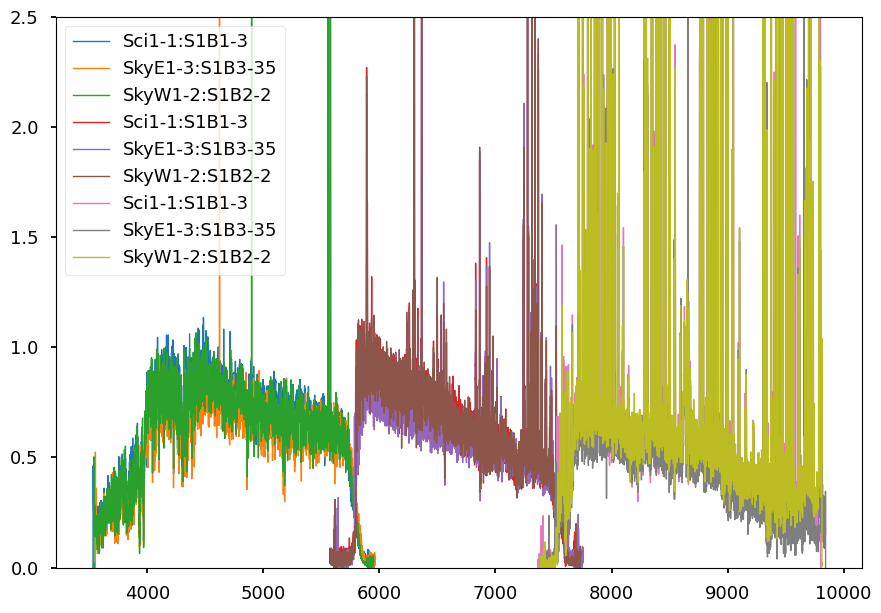

In [128]:

for cam in ["b1", "r1", "z1"]:
    rss = RSS()
    rss.loadFitsData(p+f'lvm-fobject-{cam}-00003900.fits')
    for ifiber in fibers:
        f = factors.get((fibermap[ifiber]["telescope"], cam), 1)
        print((fibermap[ifiber]["telescope"], cam), f)
        plt.plot(rss._wave[ifiber], rss._data[ifiber], "-", lw=1, label=fibermap[ifiber]["fmap"])
    plt.ylim(0,2.5)
plt.legend(loc=2)
# plt.savefig("skylight_after_flatfield_fuxed.png")

(0.0, 2.5)

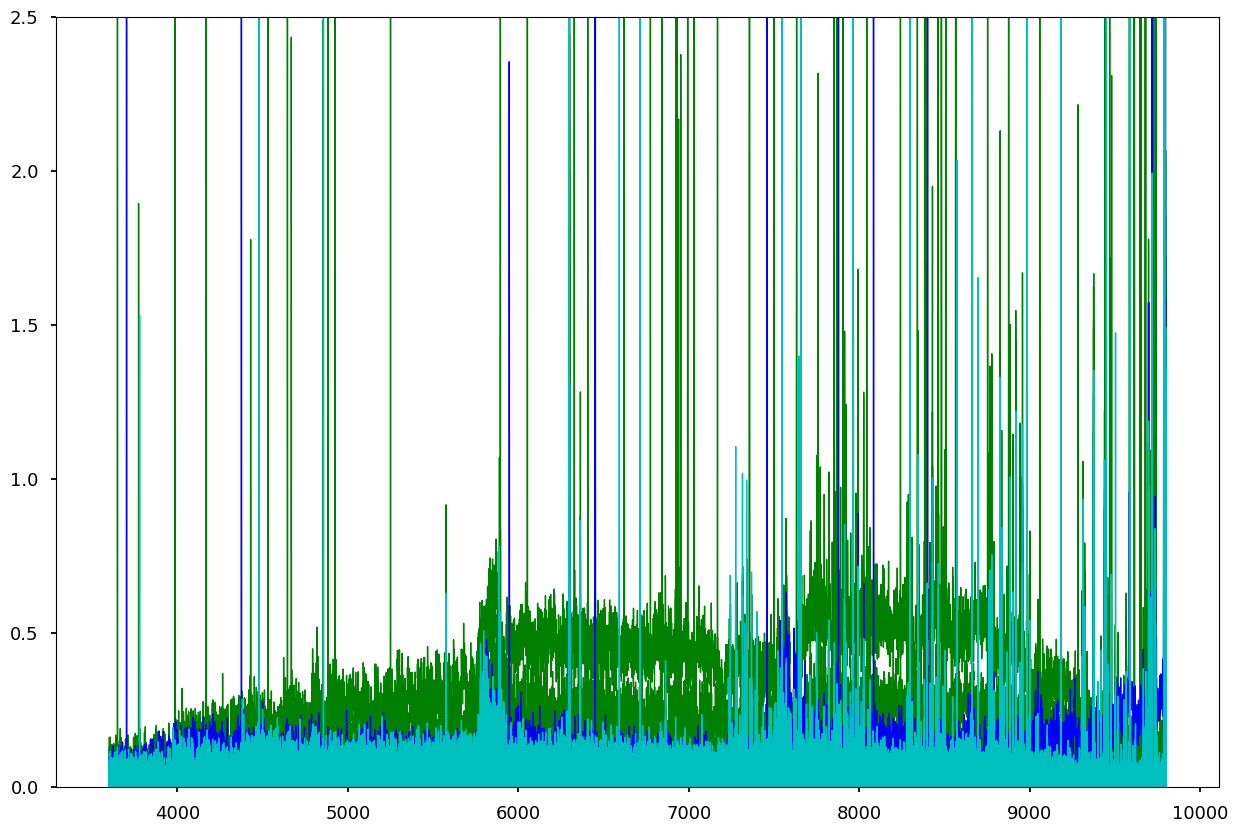

In [127]:
cframe = fits.open("/home/mejia/Research/lvm/lvmdata/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60184/" + frames4[0])

cframe[1].data[cframe[3].data.astype(bool)] = np.nan

fibermap = Table(cframe[6].data)
select_sci = fibermap["telescope"] == "Sci"
select_skw = fibermap["telescope"] == "SkyW"
select_ske = fibermap["telescope"] == "SkyE"

data_sci = cframe[1].data[select_sci]
data_skw = cframe[1].data[select_skw]
data_ske = cframe[1].data[select_ske]
wave = cframe["WAVE"].data


plt.figure(figsize=(15,10))
plt.plot(wave, data_sci[::60].T, "-", lw=1, color="g")
plt.plot(wave, data_skw[::6].T, "-", lw=1, color="b")
plt.plot(wave, data_ske[::6].T, "-", lw=1, color="c")
plt.ylim(0,2.5)